In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from time import strftime

from sklearn.conftest import fetch_california_housing
from sklearn.model_selection import train_test_split


# Classification with Keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# train, validation and test split
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalizing the data 
print (X_train.shape)
print (X_train.dtype)

X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

(55000, 28, 28)
uint8


In [3]:
# Each index in y represents one of these classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print (class_names[y_train[0]])
print (class_names[y_train[1]])


Ankle boot
T-shirt/top


In [4]:
tf.random.set_seed(42)

# One way to define a NN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=[28,28]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(300, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Another way to define the same NN (notice no Input layer)
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


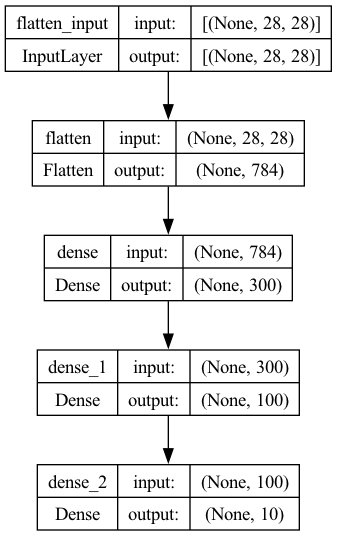

In [6]:
# Another way to get a sense of the NN 
tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
# Working with the model's layers directly (will be used later for more advanced use cases)
print ("Layers: ", model.layers)

dense_1 = model.get_layer("dense")
weights_1, biases_1 = dense_1.get_weights()
print (weights_1.shape, biases_1.shape)

Layers:  [<keras.src.layers.reshaping.flatten.Flatten object at 0x28b383650>, <keras.src.layers.core.dense.Dense object at 0x288e76350>, <keras.src.layers.core.dense.Dense object at 0x288dbef90>, <keras.src.layers.core.dense.Dense object at 0x28ae942d0>]
(784, 300) (300,)


In [43]:
# Compiling and fitting the model

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 2s 833us/step - loss: 0.1334 - accuracy: 0.9532 - val_loss: 0.3310 - val_accuracy: 0.8880
Epoch 2/30
1719/1719 [==============================] - 1s 741us/step - loss: 0.1318 - accuracy: 0.9535 - val_loss: 0.3308 - val_accuracy: 0.8920
Epoch 3/30
1719/1719 [==============================] - 1s 746us/step - loss: 0.1284 - accuracy: 0.9555 - val_loss: 0.3305 - val_accuracy: 0.8908
Epoch 4/30
1719/1719 [==============================] - 1s 766us/step - loss: 0.1280 - accuracy: 0.9558 - val_loss: 0.3334 - val_accuracy: 0.8928
Epoch 5/30
1719/1719 [==============================] - 1s 819us/step - loss: 0.1254 - accuracy: 0.9558 - val_loss: 0.3319 - val_accuracy: 0.8910
Epoch 6/30
1719/1719 [==============================] - 1s 756us/step - loss: 0.1231 - accuracy: 0.9568 - val_loss: 0.3620 - val_accuracy: 0.8890
Epoch 7/30
1719/1719 [==============================] - 1s 805us/step - loss: 0.1216 - accuracy: 0.9578 - val_loss: 0.3464 -

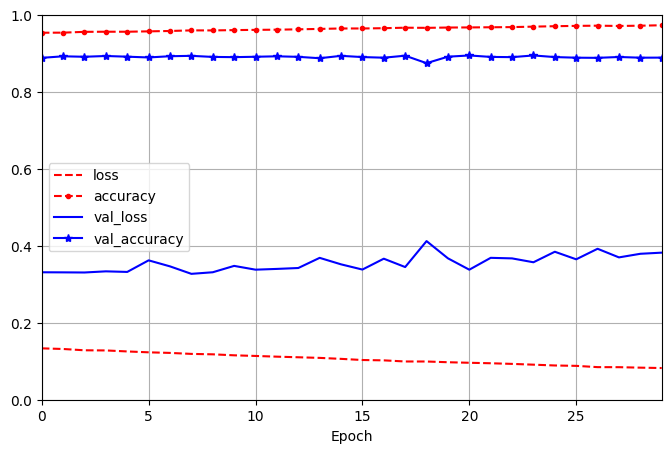

In [44]:
# history.history contains (per epoch): loss, val loss, extra metrics (train, val).
# Since we use a validation set and have an extra accuracy metric, we have 4 metrics to plot:
# train loss, val loss, train accuracy, val accuracy.
pd.DataFrame(history.history).plot(
  figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch", 
  style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [35]:
# Unbalanced dataset handling using class_weights

from sklearn.utils import compute_class_weight

# unbalanced set
y_example = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]

class_weights = compute_class_weight('balanced', classes=np.unique(y_example), y=y_example)
class_weights_dict = {i:weight for i,weight in enumerate(class_weights)}


{0: 3.3333333333333335, 1: 0.5128205128205128, 2: 1.3333333333333333}

In [45]:
# Evaluating the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 546us/step - loss: 0.4082 - accuracy: 0.8857


[0.4081856906414032, 0.885699987411499]

In [54]:
# Making predictions

predict_num = 10
y_proba = model.predict(X_test[:predict_num])
print (y_proba.round(3))

actuals = y_test[:predict_num]
predicted = np.argmax(y_proba, axis=1)

print ("Actuals: ", [class_names[i] for i in actuals])
print ("Predicted: ", [class_names[i] for i in predicted])


1/1 [==============================] - 0s 10ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.997 0.    0.003 0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.476 0.    0.    0.    0.001 0.    0.523 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]]
Actuals:  ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']
Predicted:  ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


# Regression with Keras

In [4]:
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [59]:
X_train.shape

(15480, 8)

In [71]:
# Instead of using the StandardScaler to scale the California housing dataset, we'll use Keras Normalization layer
# which does the same thing. It must be called before the model (more about these layers: Keras preprocessing layers).

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
norm_layer.adapt(X_train)

# Model has a single output neuron with no activation function.
model = tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

history = model.fit(X_train, y_train, epochs=40, validation_split=0.1)


Epoch 1/40
436/436 [==============================] - 0s 715us/step - loss: 0.8501 - root_mean_squared_error: 0.9220 - val_loss: 0.4364 - val_root_mean_squared_error: 0.6606
Epoch 2/40
436/436 [==============================] - 0s 585us/step - loss: 0.3921 - root_mean_squared_error: 0.6262 - val_loss: 0.3824 - val_root_mean_squared_error: 0.6184
Epoch 3/40
436/436 [==============================] - 0s 579us/step - loss: 0.3558 - root_mean_squared_error: 0.5965 - val_loss: 0.3661 - val_root_mean_squared_error: 0.6051
Epoch 4/40
436/436 [==============================] - 0s 557us/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 0.4051 - val_root_mean_squared_error: 0.6365
Epoch 5/40
436/436 [==============================] - 0s 569us/step - loss: 0.3278 - root_mean_squared_error: 0.5725 - val_loss: 0.3436 - val_root_mean_squared_error: 0.5862
Epoch 6/40
436/436 [==============================] - 0s 560us/step - loss: 0.3126 - root_mean_squared_error: 0.5591 - val_loss: 0

In [74]:
# Evaluate on the test set
print (model.evaluate(X_test, y_test))

162/162 [==============================] - 0s 359us/step - loss: 0.2675 - root_mean_squared_error: 0.5172
[0.26748478412628174, 0.5171893239021301]


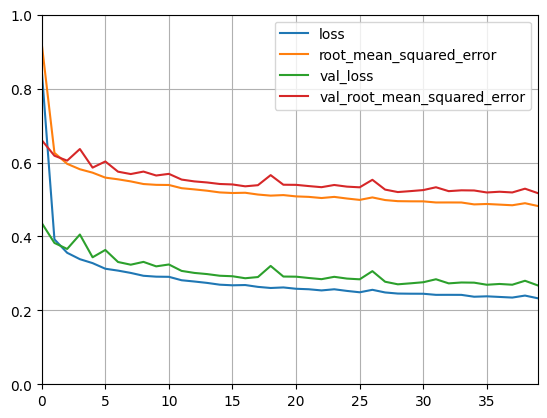

In [73]:
pd.DataFrame(history.history).plot(
  xlim=[0,39], ylim=[0,1], grid=True
)
plt.show()

# Keras Functional API

Used to build more complex network architectures.

1. Wide and Deep - single input

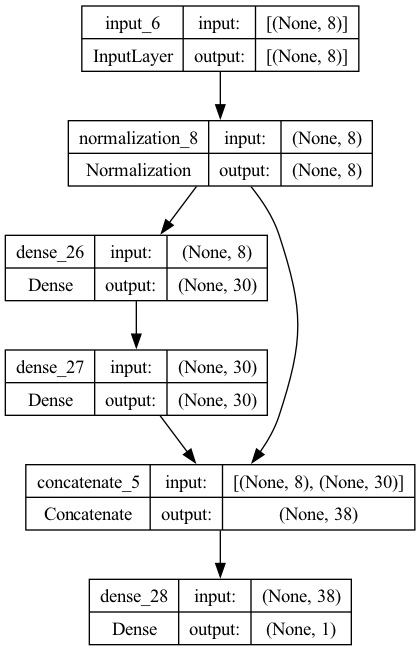

In [81]:
# Wide and deep NN architecture (inputs are connected via sequential and a bypass connection to the output layer)
# Using the California housing dataset (regression)

# Defining the layers (no connections yet)
normalization_layer = tf.keras.layers.Normalization()
normalization_layer.adapt(X_train)
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# Connecting the layers using the functional API
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
# This is the special layer which connects the inputs (normalized) and the last hidden layer (hidden2). It's a layer that can 
# take more than a single input.
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

# We create a model which takes just the input and the output layers. The connections themselves are in the layers.
model = tf.keras.Model(inputs=[input_], outputs=[output])

tf.keras.utils.plot_model(model, show_shapes=True)

2. Wide and deep - 2 inputs

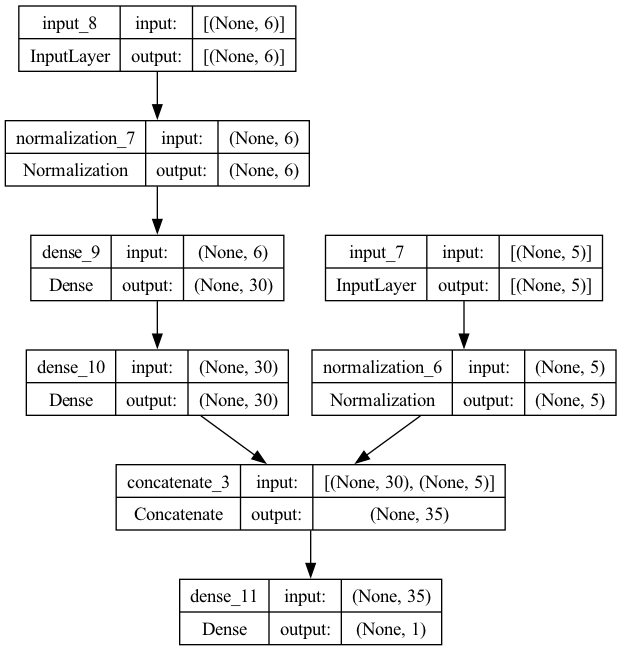

In [12]:
input_wide = tf.keras.layers.Input(shape=[5]) # 5 columns - features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # 6 columns - features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([hidden2, norm_wide])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
# Training the 2 inputs model - giving one path some examples and the other path other examples

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Some features (0-4) will go thru the wide path and others (2-7) thru the deep path
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_split=0.2)


Epoch 1/20
387/387 [==============================] - 0s 775us/step - loss: 1.3236 - root_mean_squared_error: 1.1505 - val_loss: 0.5541 - val_root_mean_squared_error: 0.7444
Epoch 2/20
387/387 [==============================] - 0s 610us/step - loss: 0.4558 - root_mean_squared_error: 0.6751 - val_loss: 0.4554 - val_root_mean_squared_error: 0.6748
Epoch 3/20
387/387 [==============================] - 0s 590us/step - loss: 0.4114 - root_mean_squared_error: 0.6414 - val_loss: 0.4441 - val_root_mean_squared_error: 0.6664
Epoch 4/20
387/387 [==============================] - 0s 560us/step - loss: 0.3962 - root_mean_squared_error: 0.6294 - val_loss: 0.4205 - val_root_mean_squared_error: 0.6485
Epoch 5/20
387/387 [==============================] - 0s 560us/step - loss: 0.3834 - root_mean_squared_error: 0.6192 - val_loss: 0.4186 - val_root_mean_squared_error: 0.6470
Epoch 6/20
387/387 [==============================] - 0s 559us/step - loss: 0.3749 - root_mean_squared_error: 0.6123 - val_loss: 0

In [14]:
model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 [==============================] - 0s 443us/step - loss: 0.3319 - root_mean_squared_error: 0.5761


[0.3318510055541992, 0.5760651230812073]

3. Auxillary output - 2 inputs, 2 outputs

Can be used for regularization

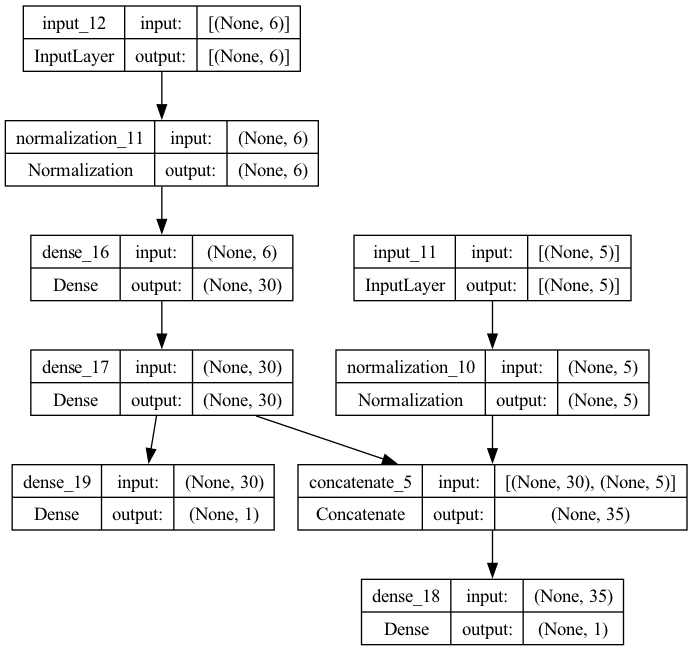

In [17]:
input_wide = tf.keras.layers.Input(shape=[5]) # 5 columns - features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # 6 columns - features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([hidden2, norm_wide])
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, output_aux])

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)

# defining the wights of each output. Keras will do a weighted sum of the loss
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])


tf.keras.utils.plot_model(model, show_shapes=True)


In [18]:
# When we train the model, we need to pass each output a set of labels (they are the same in this case)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_split=0.2)


Epoch 1/20
387/387 [==============================] - 1s 876us/step - loss: 1108.9386 - dense_18_loss: 977.8635 - dense_19_loss: 2288.6211 - dense_18_root_mean_squared_error: 31.2708 - dense_19_root_mean_squared_error: 47.8395 - val_loss: 2.2219 - val_dense_18_loss: 2.1211 - val_dense_19_loss: 3.1293 - val_dense_18_root_mean_squared_error: 1.4564 - val_dense_19_root_mean_squared_error: 1.7690
Epoch 2/20
387/387 [==============================] - 0s 668us/step - loss: 2.6812 - dense_18_loss: 2.6157 - dense_19_loss: 3.2704 - dense_18_root_mean_squared_error: 1.6173 - dense_19_root_mean_squared_error: 1.8084 - val_loss: 1.6493 - val_dense_18_loss: 1.5761 - val_dense_19_loss: 2.3089 - val_dense_18_root_mean_squared_error: 1.2554 - val_dense_19_root_mean_squared_error: 1.5195
Epoch 3/20
387/387 [==============================] - 0s 651us/step - loss: 1.8355 - dense_18_loss: 1.7397 - dense_19_loss: 2.6982 - dense_18_root_mean_squared_error: 1.3190 - dense_19_root_mean_squared_error: 1.6426 -

In [24]:
# Returns loss and metrics per output
print (model.evaluate((X_test_wide, X_test_deep), (y_test, y_test)))

# Same with predict, it returns a prediction per output.
y_pred_tuple = model.predict((X_test[:3, :5], X_test[:3, 2:]))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

162/162 [==============================] - 0s 447us/step - loss: 1.2804 - dense_18_loss: 1.2992 - dense_19_loss: 1.1115 - dense_18_root_mean_squared_error: 1.1398 - dense_19_root_mean_squared_error: 1.0543
[1.2803958654403687, 1.2991650104522705, 1.111472249031067, 1.139809250831604, 1.0542638301849365]
1/1 [==============================] - 0s 9ms/step


{'dense_18': array([[0.4069804],
        [0.7954539],
        [1.566801 ]], dtype=float32),
 'dense_19': array([[1.6140594],
        [2.1078568],
        [1.8796806]], dtype=float32)}

### Saving and loading a Keras model

In [25]:
# tf save format is an alternative to the older h5 save format. It works better with tensorflow's deployment tools.

model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [26]:
model_loaded = tf.keras.models.load_model("my_keras_model")

### Using checkpoints for longer training tasks

If your training takes a long time, you can use callbacks to checkpoint the model during training.
Callbacks can be called at different times during training: before, after, after each batch or after each epoch.

In [35]:
# This callback by default will run after each epoch. It'll save a model only if the performance on the validation set improved
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_best_only=True)

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# train, validation and test split
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalizing the data 
print (X_train.shape)
print (X_train.dtype)

X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

(55000, 28, 28)
uint8
Epoch 1/5
1686/1719 [============================>.] - ETA: 0s - loss: 0.7173 - accuracy: 0.7641INFO:tensorflow:Assets written to: my_checkpoints/assets


INFO:tensorflow:Assets written to: my_checkpoints/assets


1719/1719 [==============================] - 2s 856us/step - loss: 0.7141 - accuracy: 0.7649 - val_loss: 0.5600 - val_accuracy: 0.7958
Epoch 2/5
1694/1719 [============================>.] - ETA: 0s - loss: 0.4863 - accuracy: 0.8317INFO:tensorflow:Assets written to: my_checkpoints/assets


INFO:tensorflow:Assets written to: my_checkpoints/assets


1719/1719 [==============================] - 1s 820us/step - loss: 0.4862 - accuracy: 0.8314 - val_loss: 0.4604 - val_accuracy: 0.8340
Epoch 3/5
1650/1719 [===========================>..] - ETA: 0s - loss: 0.4410 - accuracy: 0.8460INFO:tensorflow:Assets written to: my_checkpoints/assets


INFO:tensorflow:Assets written to: my_checkpoints/assets


1719/1719 [==============================] - 1s 809us/step - loss: 0.4412 - accuracy: 0.8459 - val_loss: 0.4329 - val_accuracy: 0.8496
Epoch 4/5
1662/1719 [============================>.] - ETA: 0s - loss: 0.4150 - accuracy: 0.8561INFO:tensorflow:Assets written to: my_checkpoints/assets


INFO:tensorflow:Assets written to: my_checkpoints/assets


1719/1719 [==============================] - 1s 804us/step - loss: 0.4141 - accuracy: 0.8564 - val_loss: 0.4031 - val_accuracy: 0.8574
Epoch 5/5
1659/1719 [===========================>..] - ETA: 0s - loss: 0.3948 - accuracy: 0.8614INFO:tensorflow:Assets written to: my_checkpoints/assets


INFO:tensorflow:Assets written to: my_checkpoints/assets


1719/1719 [==============================] - 1s 836us/step - loss: 0.3946 - accuracy: 0.8616 - val_loss: 0.3866 - val_accuracy: 0.8652


### Early stopping callback

In [34]:
# patience is the number of epochs with no measurable progress on the validation set.
# restore_best_weights will rollback the best model at the end of training
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
1719/1719 [==============================] - 1s 830us/step - loss: 0.1052 - accuracy: 0.9636 - val_loss: 0.4557 - val_accuracy: 0.8696
Epoch 2/5
1719/1719 [==============================] - 1s 826us/step - loss: 0.1039 - accuracy: 0.9647 - val_loss: 0.3591 - val_accuracy: 0.8832
Epoch 3/5
1719/1719 [==============================] - 1s 779us/step - loss: 0.1009 - accuracy: 0.9659 - val_loss: 0.4720 - val_accuracy: 0.8616
Epoch 4/5
1719/1719 [==============================] - 1s 770us/step - loss: 0.1031 - accuracy: 0.9639 - val_loss: 0.3584 - val_accuracy: 0.8916
Epoch 5/5
1719/1719 [==============================] - 1s 796us/step - loss: 0.0989 - accuracy: 0.9662 - val_loss: 0.3585 - val_accuracy: 0.8878


### Writing custom callbacks

For example, a callback that shows the ratio between validation and training accuracy.

Keras has the following hooks: on_train_begin(), on_train_end(), on_epoch_begin(),  on_epoch_end().
In addition, there are hooks for batch start/end and hooks that run only during evaluation and inference.

In [33]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    ratio = logs["val_loss"] / logs["loss"]
    print (f"Epoch={epoch}, val/train={ratio:.2f}")

val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])


Epoch 1/5
1719/1719 [==============================] - 1s 865us/step - loss: 0.1144 - accuracy: 0.9603 - val_loss: 0.3483 - val_accuracy: 0.8880
Epoch 2/5
1719/1719 [==============================] - 1s 821us/step - loss: 0.1146 - accuracy: 0.9601 - val_loss: 0.3976 - val_accuracy: 0.8756
Epoch 3/5
1719/1719 [==============================] - 1s 825us/step - loss: 0.1113 - accuracy: 0.9613 - val_loss: 0.3721 - val_accuracy: 0.8868
Epoch 4/5
1719/1719 [==============================] - 1s 807us/step - loss: 0.1100 - accuracy: 0.9627 - val_loss: 0.3630 - val_accuracy: 0.8912
Epoch 5/5
1719/1719 [==============================] - 1s 855us/step - loss: 0.1074 - accuracy: 0.9626 - val_loss: 0.3582 - val_accuracy: 0.8870


## TensorBoard

View learning curves, performance (including compute resources) and metrics during training.

Your model needs to output "event" files to a dedicated logs directory that tensorboard can find. We'll use a root directory (called tensorboard_logs) and generate a subdirectory in it for each model training session. The subdirectories will use a timestamp in their
name.

In [45]:
def get_run_logdir(root_logdir="tensorboard_logs"):
  return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

# example: tensorboard_logs/run_2023_10_06_08_31_16
run_logdir = get_run_logdir()

# Now you can use a callback to manage the event files for tensorboard. 
# profile_batch tells it to only profile between batches 100 to 200 to avoid profiling the warm up period.
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100,200))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])


Epoch 1/20
  50/1719 [..............................] - ETA: 1s - loss: 0.1894 - accuracy: 0.9231

2023-10-06 08:42:25.413353: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-10-06 08:42:25.413363: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-10-06 08:42:25.413499: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


 267/1719 [===>..........................] - ETA: 1s - loss: 0.1928 - accuracy: 0.9290

2023-10-06 08:42:25.621884: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-10-06 08:42:25.621900: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-10-06 08:42:25.710595: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-10-06 08:42:25.722909: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-10-06 08:42:25.723110: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: tensorboard_logs/run_2023_10_06_08_42_25/plugins/profile/2023_10_06_08_42_25/Adams-MacBook-Pro.local.xplane.pb


1719/1719 [==============================] - 2s 894us/step - loss: 0.1930 - accuracy: 0.9307 - val_loss: 0.3324 - val_accuracy: 0.8856
Epoch 2/20
1719/1719 [==============================] - 1s 822us/step - loss: 0.1894 - accuracy: 0.9327 - val_loss: 0.3133 - val_accuracy: 0.8962
Epoch 3/20
1719/1719 [==============================] - 1s 806us/step - loss: 0.1859 - accuracy: 0.9328 - val_loss: 0.3072 - val_accuracy: 0.8928
Epoch 4/20
1719/1719 [==============================] - 1s 859us/step - loss: 0.1828 - accuracy: 0.9347 - val_loss: 0.3182 - val_accuracy: 0.8898
Epoch 5/20
1719/1719 [==============================] - 1s 866us/step - loss: 0.1809 - accuracy: 0.9354 - val_loss: 0.3287 - val_accuracy: 0.8866
Epoch 6/20
1719/1719 [==============================] - 1s 816us/step - loss: 0.1775 - accuracy: 0.9371 - val_loss: 0.3146 - val_accuracy: 0.8900
Epoch 7/20
1719/1719 [==============================] - 1s 812us/step - loss: 0.1750 - accuracy: 0.9376 - val_loss: 0.3308 - val_accura

In [47]:
# For demonstration purposes, we change the learning rate from 0.001 to 0.002 and rerun training and collect events for
# tensorboard

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100,200))
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/20


2023-10-06 08:44:38.656527: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-10-06 08:44:38.656537: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-10-06 08:44:38.656555: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


 301/1719 [====>.........................] - ETA: 1s - loss: 1.2222 - accuracy: 0.6293

2023-10-06 08:44:39.122183: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-10-06 08:44:39.122195: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-10-06 08:44:39.204596: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-10-06 08:44:39.217333: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-10-06 08:44:39.217533: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: tensorboard_logs/run_2023_10_06_08_44_38/plugins/profile/2023_10_06_08_44_39/Adams-MacBook-Pro.local.xplane.pb


1719/1719 [==============================] - 2s 878us/step - loss: 0.7172 - accuracy: 0.7633 - val_loss: 0.5176 - val_accuracy: 0.8192
Epoch 2/20
1719/1719 [==============================] - 1s 849us/step - loss: 0.4876 - accuracy: 0.8310 - val_loss: 0.4545 - val_accuracy: 0.8422
Epoch 3/20
1719/1719 [==============================] - 1s 804us/step - loss: 0.4422 - accuracy: 0.8460 - val_loss: 0.4291 - val_accuracy: 0.8496
Epoch 4/20
1719/1719 [==============================] - 1s 829us/step - loss: 0.4159 - accuracy: 0.8545 - val_loss: 0.3991 - val_accuracy: 0.8576
Epoch 5/20
1719/1719 [==============================] - 1s 796us/step - loss: 0.3977 - accuracy: 0.8617 - val_loss: 0.3861 - val_accuracy: 0.8652
Epoch 6/20
1719/1719 [==============================] - 1s 851us/step - loss: 0.3819 - accuracy: 0.8660 - val_loss: 0.3801 - val_accuracy: 0.8622
Epoch 7/20
1719/1719 [==============================] - 1s 804us/step - loss: 0.3694 - accuracy: 0.8702 - val_loss: 0.3836 - val_accura

In [ ]:
# Now we have two training session's events saved and we can start the tensorboard server to see them. By default it uses
# port 6006

%load_ext tensorboard

%tensorboard --logdir=./tensorboard_logs
